In [1]:
import numpy as np, pandas as pd, tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# 1. 데이터 로드
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TSLA.csv')
# Volume 컬럼 제거
data = df.drop('Volume', axis=1)


In [2]:
# 숫자형 컬럼만 선택
data = df.drop('Volume', axis=1).select_dtypes(include=[np.number])

# 정규화
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)


In [4]:
# 3. 윈도우 시퀀스 생성
window = 3
X, y = [], []
target_col = 'Close'
target_idx = data.columns.get_loc(target_col)

for i in range(len(data_scaled) - window):
    X.append(data_scaled[i:i+window])
    y.append(data_scaled[i+window, target_idx])

X, y = np.array(X), np.array(y)


In [5]:
# 2. 데이터 분리
split_index = int(len(y) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]


In [6]:
# 3. RNN 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(64, return_sequences=True, input_shape=(window, X.shape[2])),
    tf.keras.layers.SimpleRNN(32),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
296/296 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 7.4313e-05 - val_loss: 8.9275e-04
Epoch 2/50
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.7030e-06 - val_loss: 5.6218e-04
Epoch 3/50
296/296 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 2.8558e-06 - val_loss: 9.5190e-04
Epoch 4/50
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.4031e-06 - val_loss: 8.9061e-04
Epoch 5/50
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.8794e-06 - val_loss: 0.0012
Epoch 6/50
296/296 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 2.1022e-06 - val_loss: 0.0010
Epoch 7/50
296/296 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 3.1538e-06 - val_loss: 0.0021
Epoch 8/50
296/296 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 2.5031e-06 - val_loss: 0.0032
Epoch 9/50
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.7097e-06 - val_loss: 0.0018
Epoch 10/50
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.0918e-06 - val_loss: 0.0023
Epoch 11/50
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6644e-06 - val_loss:

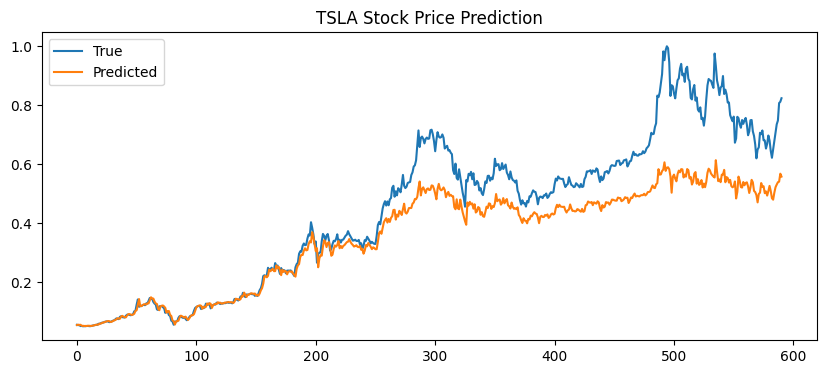

In [7]:
# 4. 학습
history = model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=1, validation_data=(X_test, y_test))

# 5. 예측 및 시각화
y_pred = model.predict(X_test)

plt.figure(figsize=(10,4))
plt.plot(y_test, label='True')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title('TSLA Stock Price Prediction')
plt.show()